[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/repos-especializacion-UdeA/trabajo-final_AA1/blob/main/notebooks_pasos_previos/01_preparacion_dataset_clasificacion_oversample.ipynb)

# Preparación del dataset de ninapro

#### Autores

* Jairo Agudelo M.
* Henry Arcila.

## 1. Librerias y configuraciones previas


In [40]:
# Verificacion de librerias necesarias antes de empezar
try:
    import scipy.io
except ImportError:
    !pip install scipy

try:
    import imblearn
except ImportError:
    !pip install imblearn

In [41]:
# Determinacion si el archivo se va a ejecutar desde colab o local y configuracion de los elementos necesarios para la ejecucion
import sys
import os

# Path del notebook
notebook_path = "."
print(notebook_path)
try:
    import google.colab
    !git clone https://github.com/repos-especializacion-UdeA/trabajo-final_AA1.git
    %cd /content/trabajo-final_AA1/notebooks_pasos_previos   
    %pwd
    ruta_base = '/content/trabajo-final_AA1/notebooks_pasos_previos/'
    sys.path.append(ruta_base)
except ImportError:
    print("El notebook no se está ejecutando en Google Colab.")
    ruta_base = './'

.
El notebook no se está ejecutando en Google Colab.


In [42]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal

## 2. Funciones

In [43]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from utils.funciones1 import multiple_plot

## 3. Carga del dataset

#### To Do...

Este dataset extraido de *UCI* (nombrado: **german.data** ) contiene información sobre **aprobación de creditos bancarios**, los cuales serán usados para la predicción de un proceso de clasificación indicando si el cliente en bueno o malo, a partir de las diferentes variables.

Url origen datos: https://raw.githubusercontent.com/repos-especializacion-UdeA/trabajo-final_AA1/refs/heads/main/notebooks_pasos_previos/datasets_tarea/db1_rms_features.csv


In [44]:
#Cargar el dataset
DATA_PATH = './datasets_tarea/'
d=pd.read_csv( DATA_PATH + 'db1_rms_features.csv')

In [45]:
d.shape

(46925, 13)

In [46]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46925 entries, 0 to 46924
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s       46925 non-null  int64  
 1   emg_1   46925 non-null  float64
 2   emg_2   46925 non-null  float64
 3   emg_3   46925 non-null  float64
 4   emg_4   46925 non-null  float64
 5   emg_5   46925 non-null  float64
 6   emg_6   46925 non-null  float64
 7   emg_7   46925 non-null  float64
 8   emg_8   46925 non-null  float64
 9   emg_9   46925 non-null  float64
 10  emg_10  46925 non-null  float64
 11  rep     46925 non-null  int64  
 12  label   46925 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 4.7 MB


In [47]:
d.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.052510,0.002414,0.002445,0.002417,0.002400,0.006204,0.0024,0.041218,0.0024,0.019526,0,0
1,1,0.038543,0.002440,0.002513,0.002443,0.002426,0.002803,0.0024,0.029789,0.0024,0.005035,0,0
2,1,0.035662,0.002448,0.002564,0.002446,0.002478,0.001975,0.0024,0.025287,0.0024,0.000813,0,0
3,1,0.037038,0.002425,0.002542,0.002420,0.002526,0.002129,0.0024,0.026216,0.0024,0.001485,0,0
4,1,0.035718,0.002404,0.002478,0.002401,0.002542,0.002346,0.0024,0.026433,0.0024,0.002234,0,0


## 4. Limpieza de datos (Data Cleaning)

In [48]:
# Borrando columnas que no se emplearán
d.drop(['s'], axis='columns', inplace=True)
d.drop(['rep'], axis='columns', inplace=True)

In [49]:
# Convirtiendo la variable label a categorica
d['label'] = pd.Categorical(d['label'])

In [50]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,label


## 5. Visualización de datos

In [51]:
# Separacion del entradas y salidas

# Entrada
emg_data = d.iloc[:,:-1]
print(emg_data.shape)
# Salida
label_data = pd.DataFrame({'label': d.iloc[:,-1]})
print(label_data.shape)

(46925, 10)
(46925, 1)


In [52]:
emg_data.head(2)

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.052510,0.002414,0.002445,0.002417,0.002400,0.006204,0.0024,0.041218,0.0024,0.019526
1,0.038543,0.002440,0.002513,0.002443,0.002426,0.002803,0.0024,0.029789,0.0024,0.005035


In [53]:
label_data.head(2)

,label
0,0
1,0


### Variables de entrada

In [54]:
numCols = emg_data.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
numCols

['emg_1',
 'emg_2',
 'emg_3',
 'emg_4',
 'emg_5',
 'emg_6',
 'emg_7',
 'emg_8',
 'emg_9',
 'emg_10']

In [55]:
emg_data[numCols].head(2)

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.052510,0.002414,0.002445,0.002417,0.002400,0.006204,0.0024,0.041218,0.0024,0.019526
1,0.038543,0.002440,0.002513,0.002443,0.002426,0.002803,0.0024,0.029789,0.0024,0.005035


In [56]:
emg_data[numCols].describe()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
count,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000,46925.000000
mean,0.071380,0.125086,0.095338,0.047645,0.013212,0.041203,0.268831,0.226359,0.135892,0.189476
std,0.215194,0.220086,0.254540,0.159635,0.034173,0.107138,0.443004,0.319496,0.297413,0.296369
min,0.000385,0.000306,0.000217,0.000316,0.000355,0.000350,0.000328,0.000326,0.000195,0.000296
25%,0.002941,0.002406,0.002542,0.002407,0.002492,0.002403,0.017919,0.049771,0.002424,0.004672
50%,0.005424,0.010434,0.004478,0.002469,0.002581,0.003538,0.137045,0.117343,0.011073,0.062891
75%,0.021904,0.169384,0.079824,0.014652,0.004082,0.029007,0.343469,0.283802,0.131968,0.253067
max,3.029289,2.953257,4.457169,4.642773,0.852200,1.890914,4.768665,4.355482,4.015512,2.897257


In [57]:
#Lista de variables categóricas
catCols = emg_data.select_dtypes(include = ['object', 'category']).columns.tolist()
catCols

[]

In [58]:
#Lista de variables numéricas

emg_data[catCols].head(2)

""
0
1


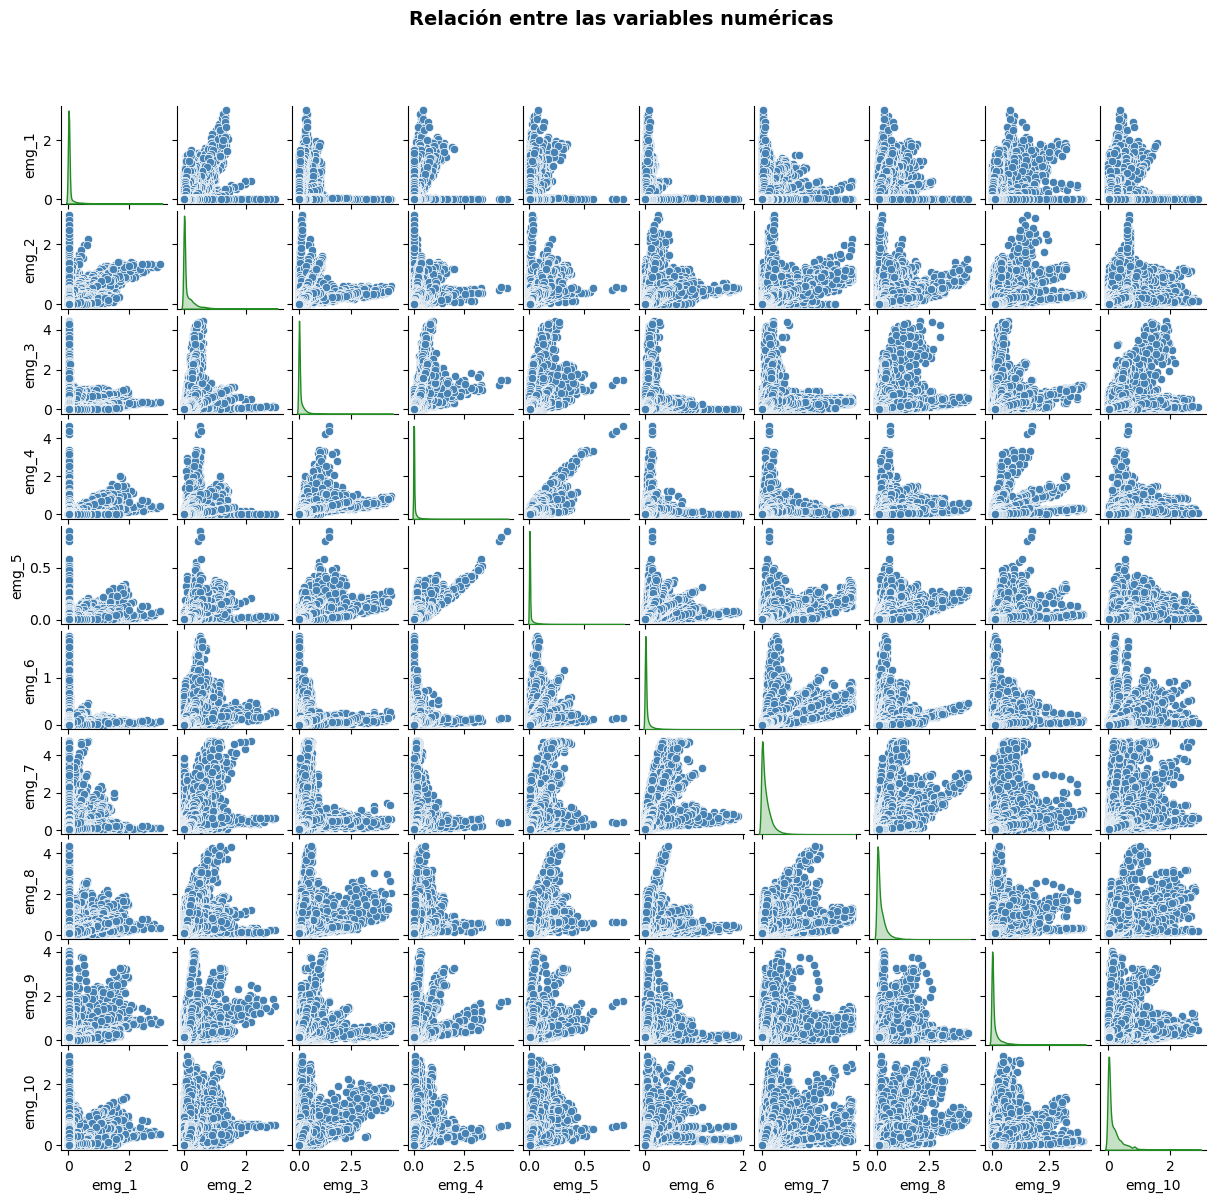

In [59]:
#Visualización de variables numéricas
multiple_plot(1, emg_data , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Variable de salida

In [60]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

In [61]:
d.groupby('label').label.count().sort_values(ascending=False)

label
0     26853
3      1876
8      1776
1      1747
5      1703
7      1697
12     1686
10     1684
6      1652
2      1629
4      1556
11     1546
9      1520
Name: label, dtype: int64

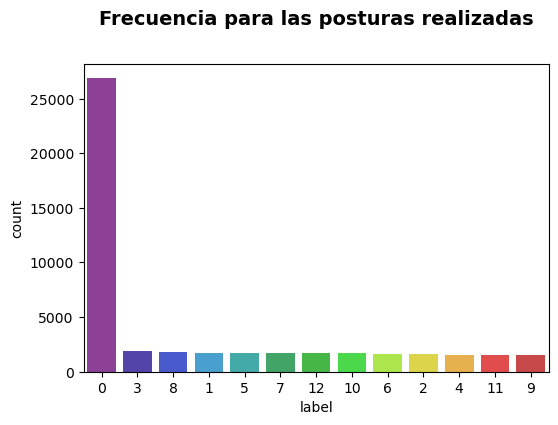

In [62]:
multiple_plot(1, label_data , None, 'label', 'countplot', 'Frecuencia para las posturas realizadas',0)

## 6. Preparación de datos

### Imputaciones

No se requiere imputaciones, solo se realizará la verificación de la completitud

In [63]:
# Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

emg_1 0
emg_2 0
emg_3 0
emg_4 0
emg_5 0
emg_6 0
emg_7 0
emg_8 0
emg_9 0
emg_10 0


In [64]:
# Identificación de valores nulos para las variables categóricas
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

### Transformaciones

Por ahora no se van a realizar transformaciones

In [65]:
# To Do

### Datos de prueba

In [66]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.90

# Número de filas para la primera parte
n_rows_part1 = int(len(d) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = d.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = d.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df = d.loc[indices_part1]
dp = d.loc[indices_part2]

In [67]:
print(df.shape)
print(dp.shape)
print("------------")
print(d.shape)

(42232, 11)
(4693, 11)
------------
(46925, 11)


### Valores atípicos para las variables de entrada

In [68]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada

vecinos = 20
# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors = vecinos, contamination=0.1)

# identificar los valores atípicos por medio de lof 
y_pred = lof.fit_predict(df[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', df[outliers].index.tolist())

Indices de valores atípicos:  [40203, 34242, 1399, 32025, 23419, 41491, 10026, 23418, 26998, 10972, 34724, 32944, 34275, 26891, 2834, 34124, 10954, 13819, 7261, 1642, 23876, 13747, 40059, 8877, 43134, 10101, 45213, 13765, 10706, 45617, 818, 9407, 38358, 41146, 28159, 45222, 5461, 43054, 2732, 694, 17088, 10364, 30556, 21666, 8485, 3762, 24231, 23228, 25240, 26518, 595, 17408, 13703, 279, 20195, 46598, 36014, 36386, 1795, 5467, 37593, 43912, 33077, 35527, 24844, 15491, 32018, 15535, 36455, 3152, 35097, 2689, 36640, 41025, 19536, 12887, 38691, 34376, 4221, 27333, 4355, 31244, 15141, 1325, 28163, 26892, 10825, 40795, 24966, 704, 41855, 5462, 35324, 16374, 26514, 37681, 23415, 34316, 13721, 41002, 36259, 8483, 46536, 1722, 37301, 6009, 14038, 44326, 39757, 40084, 18351, 34083, 39348, 27504, 23738, 46294, 3146, 10179, 38969, 27174, 2423, 719, 332, 12775, 15258, 40122, 13439, 29625, 3616, 14745, 25656, 5361, 5862, 35991, 3416, 27904, 1058, 13639, 24545, 2824, 43411, 13766, 31705, 10685, 3413

In [69]:
# Eliminar los valores atípicos del dataframe original
df = df.loc[~outliers]

In [70]:
df.shape

(38008, 11)

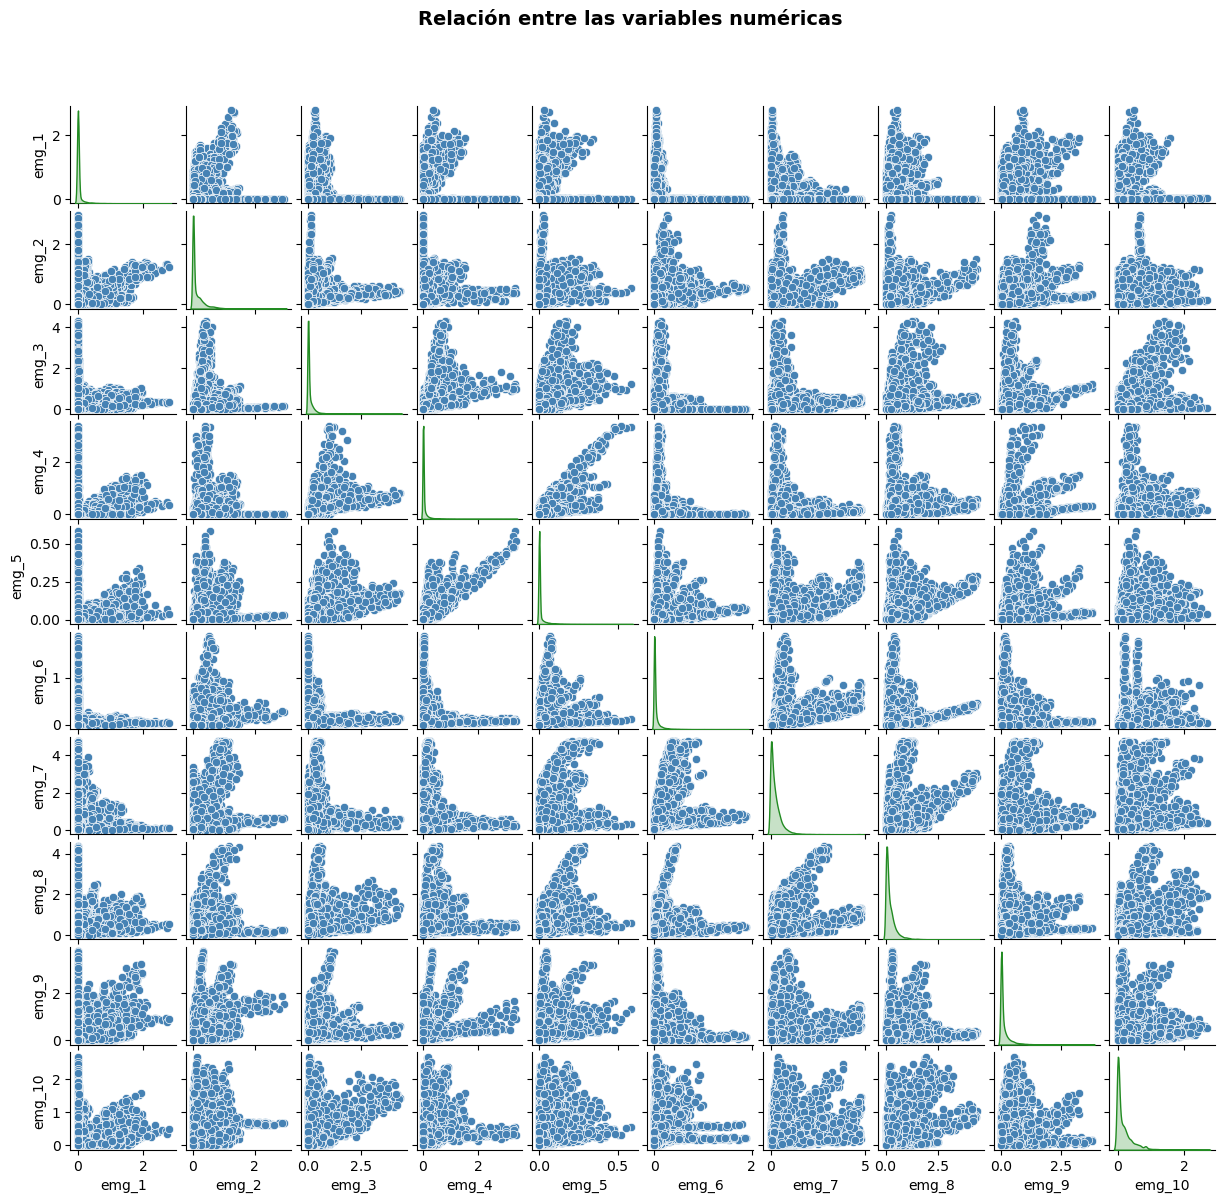

In [71]:
#Visualización de variables numéricas
multiple_plot(1, df , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Sobremuestreo (oversampling)

In [72]:
#!pip install imblearn

In [80]:
df.columns

Index(['emg_1', 'emg_2', 'emg_3', 'emg_4', 'emg_5', 'emg_6', 'emg_7', 'emg_8',
       'emg_9', 'emg_10', 'label'],
      dtype='object')

In [74]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase 
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(df[numCols], df['label'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=df[numCols].columns)
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

# df=df_balanced

In [75]:
print(df.shape)             # Caso desbalanceado
print(df_balanced.shape)    # Caso balanceado

(38008, 11)
(281346, 11)


In [76]:
# Actualizando el dataframe de trabajo para que quede con el caso balanceado
df = df_balanced
df.shape

(281346, 11)

In [77]:
# Dataset balanceado
df.head(2)

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,label
0,0.011621,0.002400,0.002584,0.002400,0.002537,0.0024,0.002400,0.002464,0.002429,0.002426,0
1,0.005191,0.012226,0.023951,0.002395,0.002425,0.0024,0.118717,0.057858,0.020925,0.002397,0


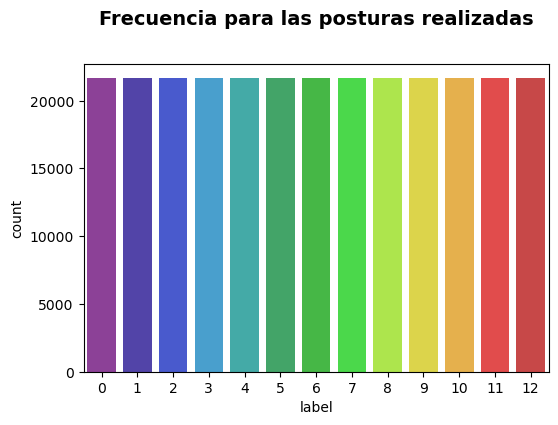

In [78]:
multiple_plot(1, df_balanced , None, 'label', 'countplot', 'Frecuencia para las posturas realizadas',0)

## 7. Exportar el dataset

In [79]:
# Exportamos el dataframe a un archivo CSV
df.to_csv('./datasets_tarea/db1_rms_prep.csv', index=False)
dp.to_csv('./datasets_tarea/db1_rms_prue.csv', index=False)

### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  